In [1]:
import pandas as pd

In [3]:
# Load the dataset(step 1 loading data and prepare)
df = pd.read_csv('bank.csv')

In [5]:
# Display the first few rows of the dataset
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [7]:
# Check for missing values
df.isnull().sum()


age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64

In [9]:
# Get an overview of the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  4521 non-null   object
dtypes: object(1)
memory usage: 35.4+ KB


In [11]:
# Basic statistics
df.describe()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
count,4521
unique,4521
top,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
freq,1


In [15]:
# Drop missing values
df = df.dropna()

In [35]:
# step 2 EDA Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Check the column names to see how they are formatted
print(df.columns)


Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')


In [39]:
# Clean up column names by stripping whitespace or unwanted characters
df.columns = df.columns.str.strip().str.replace('"', '')

In [41]:
# Verify that column names are now clean
print(df.columns)

Index(['age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;y'], dtype='object')


In [53]:
print(df.columns)

Index(['age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;y'], dtype='object')


In [55]:
# Manually rename the columns
df.rename(columns={"\"age\"": "age", "age;": "age"}, inplace=True)

# Verify the change
print(df.columns)

Index(['age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;y'], dtype='object')


In [57]:
print(df.head)

<bound method NDFrame.head of      age;job;marital;education;default;balance;housing;loan;contact;day;month;duration;campaign;pdays;previous;poutcome;y
0     30;"unemployed";"married";"primary";"no";1787;...                                                                  
1     33;"services";"married";"secondary";"no";4789;...                                                                  
2     35;"management";"single";"tertiary";"no";1350;...                                                                  
3     30;"management";"married";"tertiary";"no";1476...                                                                  
4     59;"blue-collar";"married";"secondary";"no";0;...                                                                  
...                                                 ...                                                                  
4516  33;"services";"married";"secondary";"no";-333;...                                                             

In [65]:
# Re-read the dataset with semicolon separator
df = pd.read_csv('bank.csv', sep=';')

# Verify if columns are separated correctly now
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


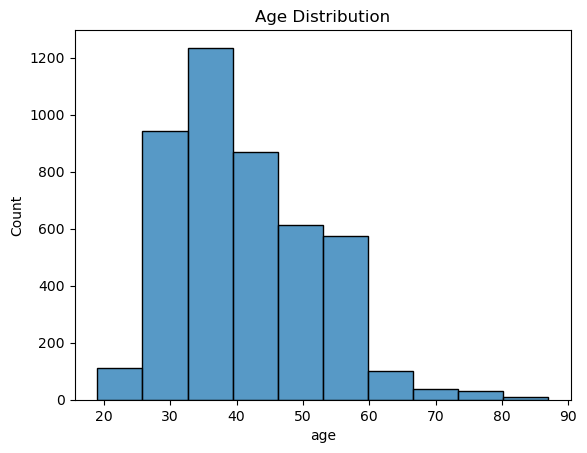

In [67]:
sns.histplot(df['age'], bins=10)
plt.title('Age Distribution')
plt.show()

In [7]:
# Check the column names in your dataset
print(data.columns)


Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


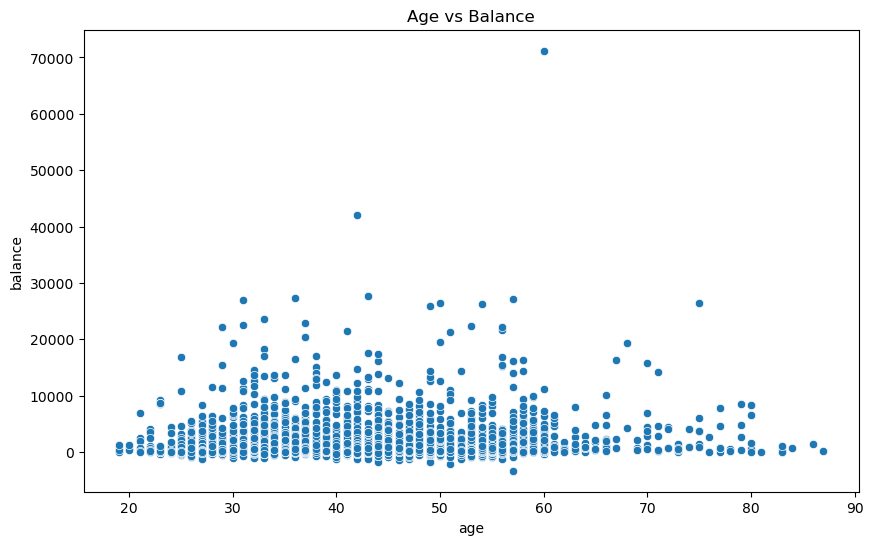

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('bank.csv', delimiter=';')

# Inspect the first few rows to make sure the data is loaded
print(data.head())
# Step 2: Plot Age vs Balance
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='balance', data=data)
plt.title('Age vs Balance')
plt.show()

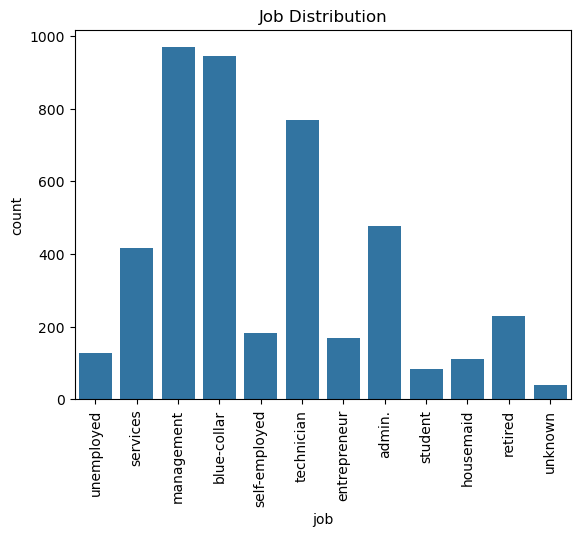

In [15]:
sns.countplot(x='job', data=data)
plt.title('Job Distribution')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()

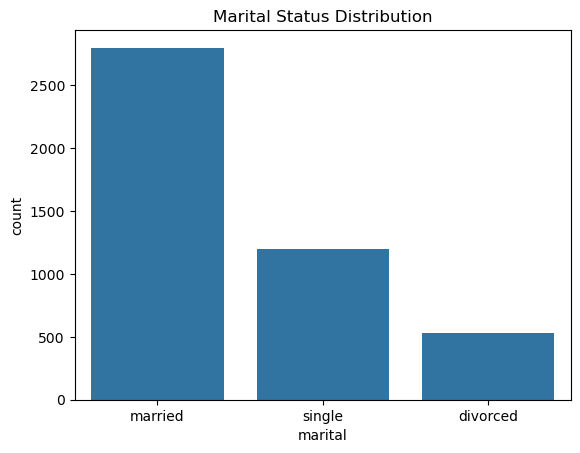

In [17]:
sns.countplot(x='marital', data=data)
plt.title('Marital Status Distribution')
plt.show()

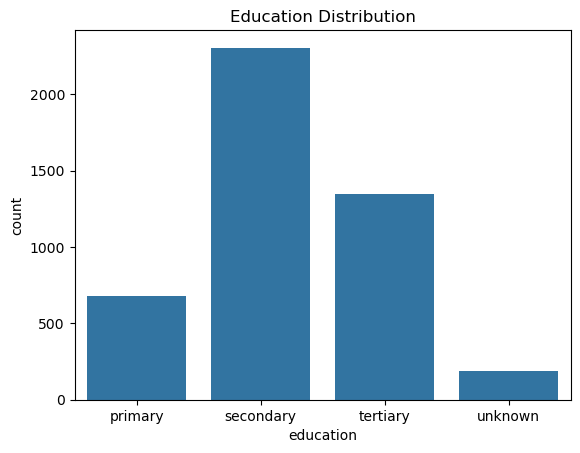

In [19]:
sns.countplot(x='education', data=data)
plt.title('Education Distribution')
plt.show()

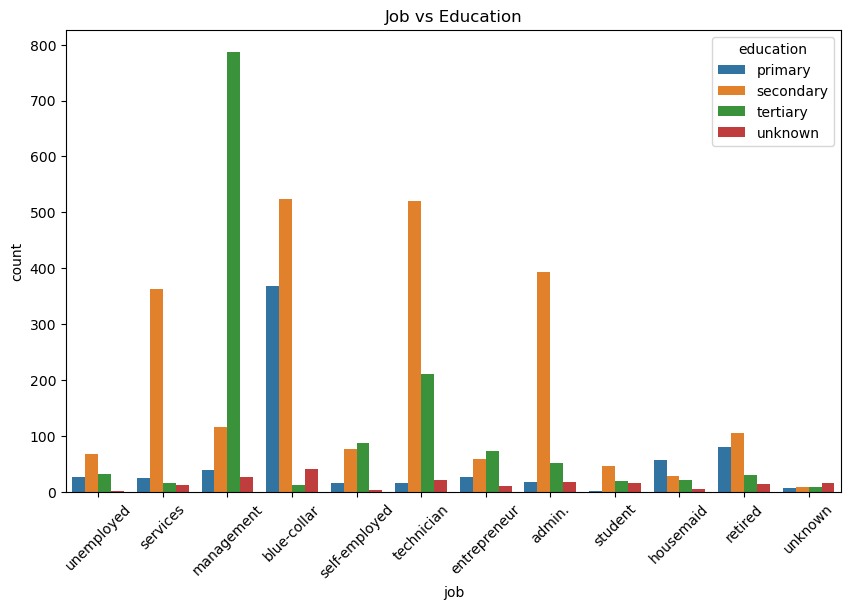

In [21]:
# Job vs Education (Count Plot)
plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='education', data=data)
plt.title('Job vs Education')
plt.xticks(rotation=45)
plt.show()

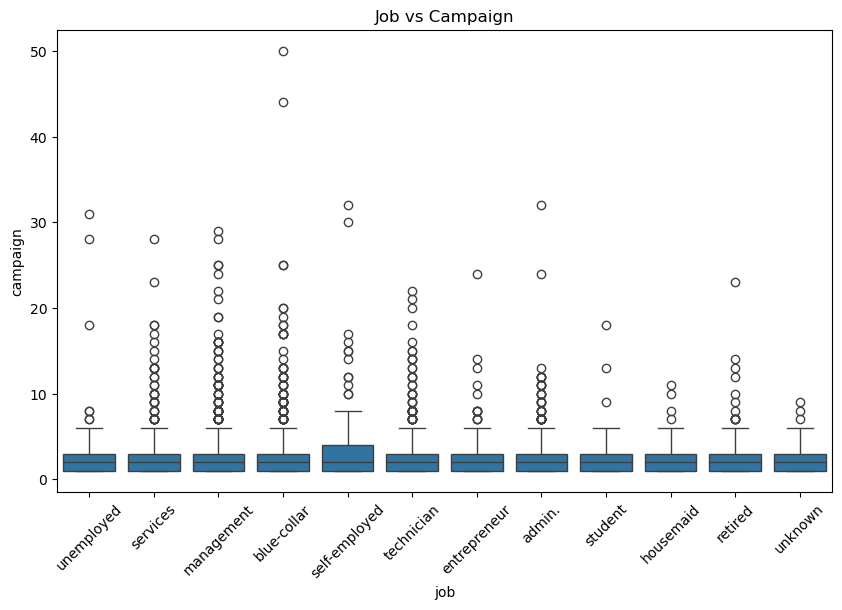

In [23]:
# Job vs Campaign (Box Plot)
plt.figure(figsize=(10,6))
sns.boxplot(x='job', y='campaign', data=data)
plt.title('Job vs Campaign')
plt.xticks(rotation=45)
plt.show()

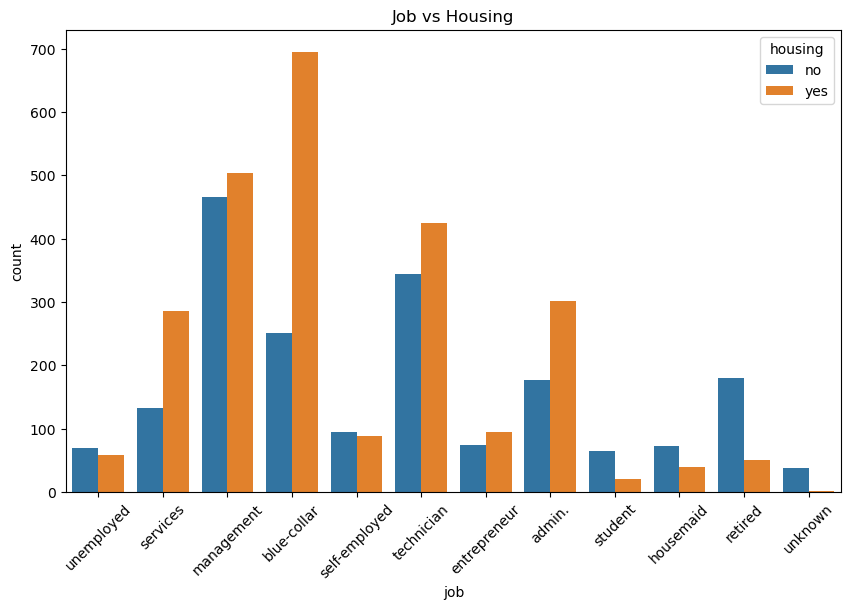

In [25]:
# Job vs Housing (Count Plot)
plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='housing', data=data)
plt.title('Job vs Housing')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Correlation Matrix

In [27]:
import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'unemployed'

In [ ]:
# Target Variable Distribution

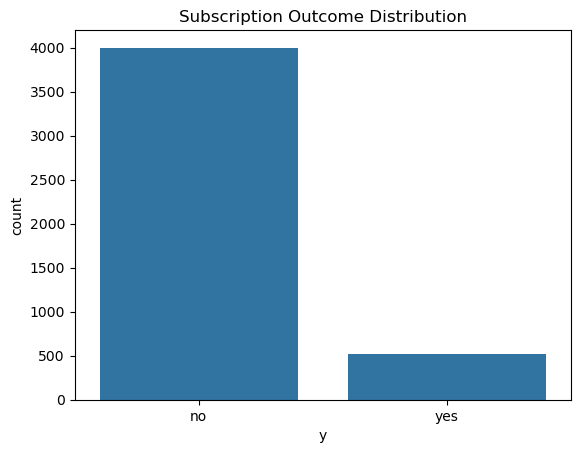

In [29]:
sns.countplot(x='y', data=data)
plt.title('Subscription Outcome Distribution')
plt.show()

In [ ]:
# Relationship Between Categorical Features and Target Variable

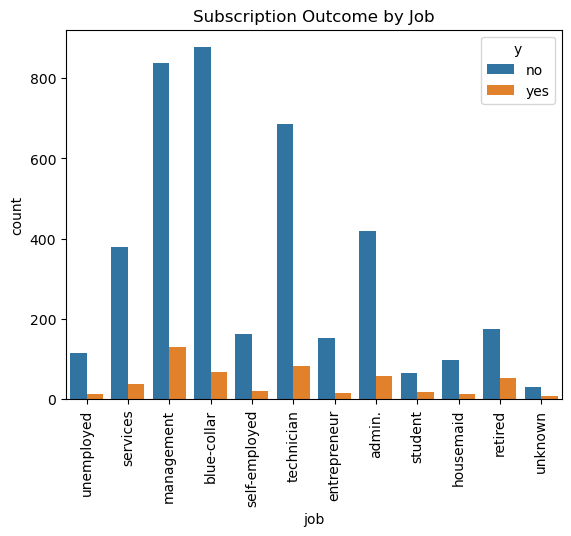

In [31]:
sns.countplot(x='job', hue='y', data=data)
plt.title('Subscription Outcome by Job')
plt.xticks(rotation=90)
plt.show()

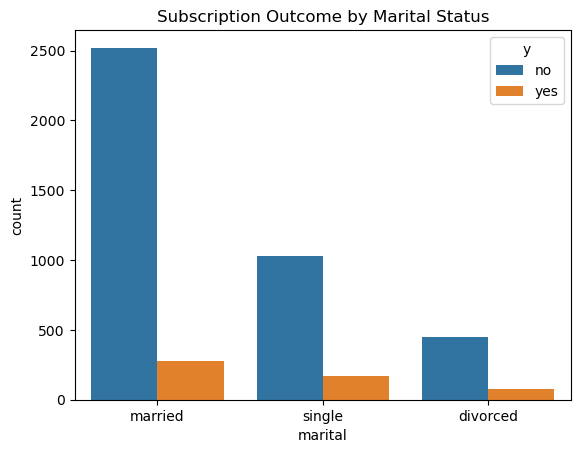

In [33]:
sns.countplot(x='marital', hue='y', data=data)
plt.title('Subscription Outcome by Marital Status')
plt.show()

In [ ]:
#  Numerical Variables vs Target Variable

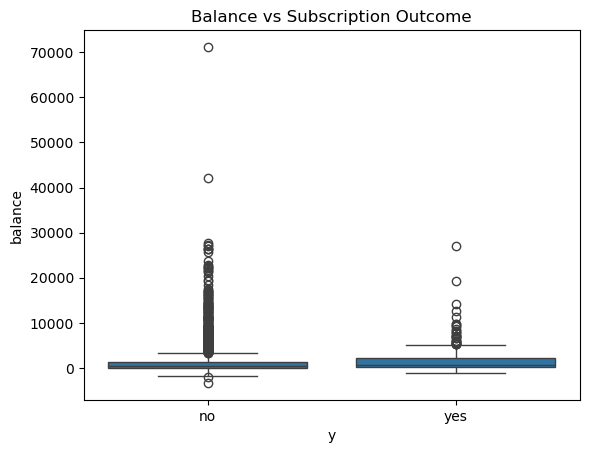

In [35]:
sns.boxplot(x='y', y='balance', data=data)
plt.title('Balance vs Subscription Outcome')
plt.show()

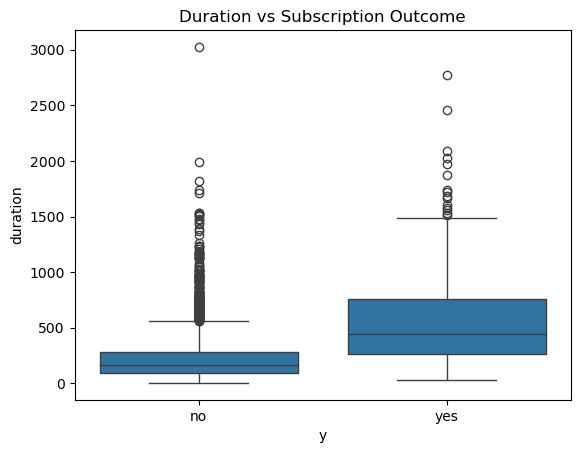

In [37]:
sns.boxplot(x='y', y='duration', data=data)
plt.title('Duration vs Subscription Outcome')
plt.show()

In [23]:
# STEP 3 1. Identify Categorical and Numerical Variables, 2. Handle Missing Values,3. Encode Categorical Variables, 4. Encode the Target Variable, 5. Scale Numerical Features, 6. Feature Selection (Optional but Recommended), 7. Final Data Inspection 

In [25]:
# Encode categorical features(step 3 data prepocessing)
from sklearn.preprocessing import LabelEncoder

In [47]:
# Handling missing data
# Option 1: Remove rows with missing values
data_encoded = data_encoded.dropna()

# Define numerical and categorical columns
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data_encoded.select_dtypes(include=['object', 'category']).columns

# Now proceed with the missing value handling as before

# Imputation for numerical data
num_imputer = SimpleImputer(strategy='mean')
data_encoded[numerical_columns] = num_imputer.fit_transform(data_encoded[numerical_columns])

# Imputation for categorical data
cat_imputer = SimpleImputer(strategy='most_frequent')
data_encoded[categorical_columns] = cat_imputer.fit_transform(data_encoded[categorical_columns])



In [49]:
# Ensure numerical columns are defined
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Outlier detection using IQR (Interquartile Range)
Q1 = data_encoded[numerical_columns].quantile(0.25)
Q3 = data_encoded[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5*IQR from Q1 and Q3
outliers = (data_encoded[numerical_columns] < (Q1 - 1.5 * IQR)) | (data_encoded[numerical_columns] > (Q3 + 1.5 * IQR))

# Option 1: Removing outliers
# This will remove rows with outliers in any numerical column
data_encoded = data_encoded[~outliers.any(axis=1)]

# Option 2: You can also handle outliers differently, such as capping them
# Example for capping:
# data_encoded[numerical_columns] = data_encoded[numerical_columns].apply(
#     lambda x: np.where(x < (Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, np.where(x > (Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, x))
# )


In [71]:
# Print the first few rows of encoded dataset
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   30     1787   19        79         1     -1         0            False   
1   33     4789   11       220         1    339         4            False   
2   35     1350   16       185         1    330         1            False   
3   30     1476    3       199         4     -1         0            False   
4   59        0    5       226         1     -1         0             True   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False      False   
1             False          False  ...      False      False       True   
2             False          False  ...      False      False      False   
3             False          False  ...       True      False      False   
4             False          False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0 

In [73]:
# Features (X) and Target (y)
X = df_encoded.drop('y_yes', axis=1)  # 'y_yes' is the target variable (1 for yes, 0 for no)
y = df_encoded['y_yes']

In [75]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Import the necessary module for scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [89]:

# Predictions
y_pred = model.predict(X_test)

In [91]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
print(data.columns)


Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')


In [19]:
# Assuming 'data' is your DataFrame
data = data[data.columns[0]].str.split(';', expand=True)


Encoded Data Columns:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_services', 'job_unemployed', 'marital_single',
       'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes',
       'month_may', 'month_oct', 'poutcome_unknown'],
      dtype='object')
Correlation Matrix:
                          age   balance       day  duration  campaign  \
age                  1.000000 -0.002016 -0.475218  0.796499       NaN   
balance             -0.002016  1.000000 -0.878908  0.603032       NaN   
day                 -0.475218 -0.878908  1.000000 -0.910514       NaN   
duration             0.796499  0.603032 -0.910514  1.000000       NaN   
campaign                  NaN       NaN       NaN       NaN       NaN   
pdays                0.908187  0.416734 -0.799869  0.976451       NaN   
previous             0.349957  0.936058 -0.990536  0.845146       NaN   
job_services         0.114708  0.993166 -0.928571  0.692013       NaN   
job_unempl

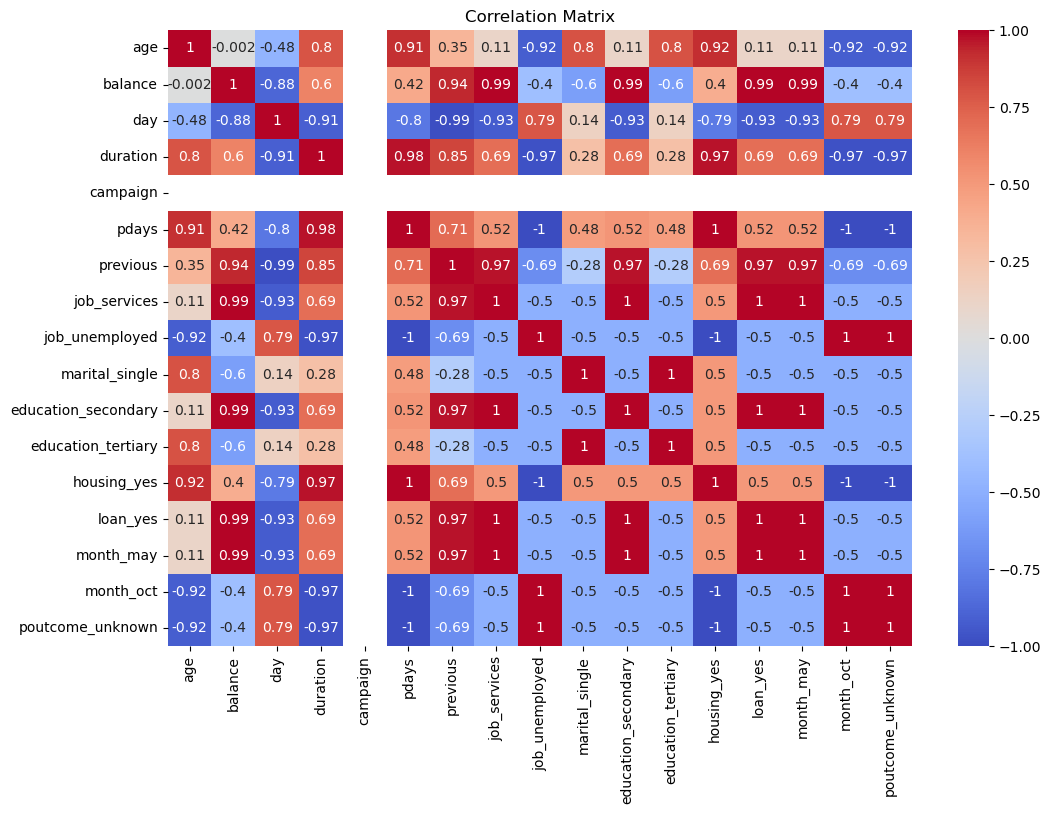

'y' is not present in the correlation matrix.


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset DATA LOADINNG ND INITIAL PREPARATION
# Sample dataframe for demonstration (replace this with your actual data loading step)
data = pd.DataFrame({
    'data': ['30;unemployed;married;primary;no;1787;no;no;cellular;19;oct;79;1;-1;0;unknown;no',
             '33;services;married;secondary;no;4789;yes;yes;cellular;11;may;220;1;339;4;failure;no',
             '35;management;single;tertiary;no;1350;yes;no;cellular;16;apr;185;1;330;1;failure;no']
})

# Split the single column into multiple columns based on the semicolon (;) DATA CLEANING
data = data['data'].str.split(';', expand=True)

# Assign the correct column names
data.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 
                'housing', 'loan', 'contact', 'day', 'month', 'duration', 
                'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Convert numeric columns from string to their appropriate types
data['age'] = data['age'].astype(int)
data['balance'] = data['balance'].astype(float)
data['day'] = data['day'].astype(int)
data['duration'] = data['duration'].astype(int)
data['campaign'] = data['campaign'].astype(int)
data['pdays'] = data['pdays'].astype(int)
data['previous'] = data['previous'].astype(int)

# List of categorical columns for encoding
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                    'loan', 'contact', 'month', 'poutcome', 'y']  # Include 'y' if it's categorical

# One-Hot Encoding using pandas.get_dummies FEATURE ENGINEERING
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Inspect the new columns
print("Encoded Data Columns:")
print(data_encoded.columns)  # Check if 'y' is included

# Check for correlation EXPLORATORY DATA ANALYSIS(EDA)
plt.figure(figsize=(12, 8))
corr_matrix = data_encoded.corr()

# Print the correlation matrix to debug
print("Correlation Matrix:")
print(corr_matrix)  # Check the correlation matrix

# Now plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Set annot=True to see the correlation values
plt.title('Correlation Matrix')
plt.show()

# Ensure 'y' is in the correlation matrix before trying to access it FEATURE SELECTION
if 'y' in corr_matrix.columns:
    # Identify features with low correlation with target 'y'
    low_corr_features = corr_matrix['y'][corr_matrix['y'].abs() < 0.05].index.tolist()
    print("Low correlation features:", low_corr_features)

    # Drop low correlation features if necessary
    data_encoded.drop(low_corr_features, axis=1, inplace=True)
else:
    print("'y' is not present in the correlation matrix.")


In [51]:
pip install category_encoders


   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   -------------- ------------------------- 30.7/82.0 kB 87.5 kB/s eta 0:00:01
   -------------- ------------------------- 30.7/82.0 kB 87.5 kB/s eta 0:00:01
   -------------- ------------------------- 30.7/82.0 kB 87.5 kB/s eta 0:00:01
   -------------- ------------------------- 30.7/82.0 kB 87.5 kB/s eta 0:00:01
   -------------- ------------------------- 30.7/82.0 kB 87.5 kB/s eta 0:00:01
   ------------------- -----------------

In [60]:
print(data_encoded.columns)


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_services', 'job_unemployed', 'marital_single',
       'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes',
       'month_may', 'month_oct', 'poutcome_unknown', 'age_group'],
      dtype='object')


In [66]:
print(data_encoded.columns)


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_services', 'job_unemployed', 'marital_single',
       'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes',
       'month_may', 'month_oct', 'poutcome_unknown', 'age_group'],
      dtype='object')


In [72]:
import numpy as np

# Create a synthetic target for binary classification (0 or 1)
data_encoded['target'] = np.random.choice([0, 1], size=len(data_encoded))

# Now proceed with encoding
from category_encoders import TargetEncoder
target_encoder = TargetEncoder()
data_encoded['job_services_encoded'] = target_encoder.fit_transform(data_encoded['job_services'], data_encoded['target'])



In [74]:
print(data_encoded.dtypes)
# Ensure 'job_services' is in the correct format for target encoding
data_encoded['job_services'] = data_encoded['job_services'].astype('category')

# Apply target encoding
from category_encoders import TargetEncoder
target_encoder = TargetEncoder()
data_encoded['job_services_encoded'] = target_encoder.fit_transform(data_encoded['job_services'], data_encoded['target'])


age                        int32
balance                  float64
day                        int32
duration                   int32
campaign                   int32
pdays                      int32
previous                   int32
job_services                bool
job_unemployed              bool
marital_single              bool
education_secondary         bool
education_tertiary          bool
housing_yes                 bool
loan_yes                    bool
month_may                   bool
month_oct                   bool
poutcome_unknown            bool
age_group               category
target                     int32
job_services_encoded        bool
dtype: object


In [54]:
# Identifying numerical columns
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Scaling numerical data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Option 1: Standardization (mean=0, std=1)
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Option 2: Min-Max scaling (scaling to [0, 1])
scaler = MinMaxScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])


In [76]:
# MODEL SELECTION AND TRAINING

In [78]:
# Splitting the Data into Training and Testing Sets

In [96]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data_encoded.drop(columns=['target'])  # Drop the target column from the features
y = data_encoded['target']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [82]:
# Model Selection:

In [104]:
print(X_train.columns)



Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_unemployed', 'marital_single', 'education_secondary',
       'education_tertiary', 'housing_yes', 'loan_yes', 'month_may',
       'month_oct', 'poutcome_unknown', 'job_services_encoded',
       'job_services_True', 'age_group_30-40', 'age_group_40-50',
       'age_group_50-60', 'age_group_60+'],
      dtype='object')


In [118]:
print(y_train.unique())

# Check unique classes in the target variable
print(y_train.value_counts())

# If there's only one class, consider resampling or obtaining more data
if y_train.nunique() < 2:
    print("Only one class found in y_train. Please check your dataset.")
else:
    # Proceed to fit the model
    model.fit(X_train, y_train)


[1]
target
1    2
Name: count, dtype: int64
Only one class found in y_train. Please check your dataset.


In [120]:
print(X_train.columns)



Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_unemployed', 'marital_single', 'education_secondary',
       'education_tertiary', 'housing_yes', 'loan_yes', 'month_may',
       'month_oct', 'poutcome_unknown', 'job_services_encoded',
       'job_services_True', 'age_group_30-40', 'age_group_40-50',
       'age_group_50-60', 'age_group_60+'],
      dtype='object')


In [128]:
# Check the columns to ensure you know what you're working with
print(X_train.columns)







Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_unemployed', 'marital_single', 'education_secondary',
       'education_tertiary', 'housing_yes', 'loan_yes', 'month_may',
       'month_oct', 'poutcome_unknown', 'job_services_encoded',
       'job_services_True', 'age_group_30-40', 'age_group_40-50',
       'age_group_50-60', 'age_group_60+'],
      dtype='object')


In [130]:
print(X.columns)  # Assuming X is your original features DataFrame


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_services', 'job_unemployed', 'marital_single',
       'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes',
       'month_may', 'month_oct', 'poutcome_unknown', 'age_group',
       'job_services_encoded'],
      dtype='object')


In [138]:
import pandas as pd

# Print the columns to check their names
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

# Assuming the column exists and is correctly named:
if 'job_services' in X_train.columns and 'job_services' in X_test.columns:
    # Split the job_services column by commas and explode to create separate rows
    X_train['job_services'] = X_train['job_services'].str.split(',')
    X_test['job_services'] = X_test['job_services'].str.split(',')

    # Now, explode the lists into separate rows
    X_train_exploded = X_train.explode('job_services')
    X_test_exploded = X_test.explode('job_services')

    # Proceed with encoding or further processing
else:
    print("Column 'job_services' is missing in either X_train or X_test.")





X_train columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_unemployed', 'marital_single', 'education_secondary',
       'education_tertiary', 'housing_yes', 'loan_yes', 'month_may',
       'month_oct', 'poutcome_unknown', 'job_services_encoded',
       'job_services_True', 'age_group_30-40', 'age_group_40-50',
       'age_group_50-60', 'age_group_60+'],
      dtype='object')
X_test columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_unemployed', 'marital_single', 'education_secondary',
       'education_tertiary', 'housing_yes', 'loan_yes', 'month_may',
       'month_oct', 'poutcome_unknown', 'job_services_encoded',
       'job_services_True', 'age_group_30-40', 'age_group_40-50',
       'age_group_50-60', 'age_group_60+'],
      dtype='object')
Column 'job_services' is missing in either X_train or X_test.


In [173]:
# Install necessary packages if you haven't already
!pip install pandas numpy scikit-learn matplotlib


In [174]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [183]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Check the column names in the dataset
print(data.columns)


Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')


In [23]:
import pandas as pd

# Read the CSV file with the correct delimiter
data = pd.read_csv('bank.csv', sep=';')

# Check the corrected column names
print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [29]:
# Define your features (X) and target (y)
X = data.drop('y', axis=1)  # 'y' is the target column
y = data['y']

# Now split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of X_train to verify
print(f'Number of training samples: {X_train.shape[0]}')


Number of training samples: 3616


In [90]:
# Hyperparameter Tuning:

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load your dataset (ensure to use the correct delimiter)
df = pd.read_csv('bank.csv', sep=';')  # Use ';' as the separator if needed

# Print columns to verify
print("Columns in the dataset:")
print(df.columns)

# Target column
target_column = 'y'  # The target column is confirmed to be 'y'

# Define features and target variable
X = df.drop(columns=[target_column])  # Drop the target column to get features
y = df[target_column]  # Target variable

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


Columns in the dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Confusion Matrix:
[[789  18]
 [ 71  27]]

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905

Best Hyperparameters:
{'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Confusion Matrix for Best Model:
[[789  18]
 [ 71  27]]

Classification Report for Best Model:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.60      0.28      0.38        98

    accuracy                           0

In [33]:
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [211]:
# Model Evaluation:

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load your dataset (ensure to use the correct delimiter)
df = pd.read_csv('bank.csv', sep=';')  # Use ';' as the separator if needed

# Print columns to verify
print("Columns in the dataset:")
print(df.columns)

# Target column
target_column = 'y'  # The target column is confirmed to be 'y'

# Define features and target variable
X = df.drop(columns=[target_column])  # Drop the target column to get features
y = df[target_column]  # Target variable

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaled datasets to CSV files
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Create DataFrame for training features
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)  # Create DataFrame for testing features

# Save the target variables to CSV files
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

# Combine features and targets for saving
train_data = pd.concat([X_train_scaled_df, y_train_df], axis=1)
test_data = pd.concat([X_test_scaled_df, y_test_df], axis=1)

# Save to CSV
train_data.to_csv('train_data_scaled.csv', index=False)
test_data.to_csv('test_data_scaled.csv', index=False)

print("Training and testing datasets saved successfully.")


Columns in the dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Training and testing datasets saved successfully.


In [94]:
print(data_encoded.columns)


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_services', 'job_unemployed', 'marital_single',
       'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes',
       'month_may', 'month_oct', 'poutcome_unknown', 'age_group', 'target',
       'job_services_encoded'],
      dtype='object')


In [195]:
# Load your dataset
data = pd.read_csv('bank.csv')  # Replace with your actual dataset path

# Check the columns of the dataset
print("Columns in the dataset:")
print(data.columns.tolist())  # List all column names to find the target variable

# Strip whitespace from column names if needed
data.columns = data.columns.str.strip()

# Use the actual target column name after checking the output above
target_column = 'Outcome'  # Replace with the actual target column name

# Check if the target column exists
if target_column not in data.columns:
    print(f"Target column '{target_column}' not found. Please check the column names.")
else:
    # Split data into features and target variable
    X = data.drop(target_column, axis=1)  # Use the actual target column name
    y = data[target_column]  # This should be your target variable

    # Split the dataset into training and test sets with a smaller test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # Adjust as needed

    # Train a Random Forest classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Cross-validation scores with adjusted n_splits
    cv_scores = cross_val_score(model, X_train, y_train, cv=2)  # Use cv=2
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean CV score: {np.mean(cv_scores)}')


Columns in the dataset:
['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"']
Target column 'Outcome' not found. Please check the column names.


In [45]:
# Deployment and Decision Support

In [47]:
import pandas as pd

df = pd.read_csv('bank.csv')  # Replace with your dataset path


In [ ]:
# 1. Export Model Predictions to Excel

In [53]:
import pandas as pd

# Assuming `y_pred` contains your predictions and `X_test` contains your test features
predictions_df = X_test.copy()
predictions_df['Predicted'] = y_pred  # Add predictions to the DataFrame

# Save to Excel
predictions_df.to_excel('model_predictions.xlsx', index=False)
print("Predictions exported to 'model_predictions.xlsx'")


Predictions exported to 'model_predictions.xlsx'


In [55]:
# 2. Visualize Key Insights

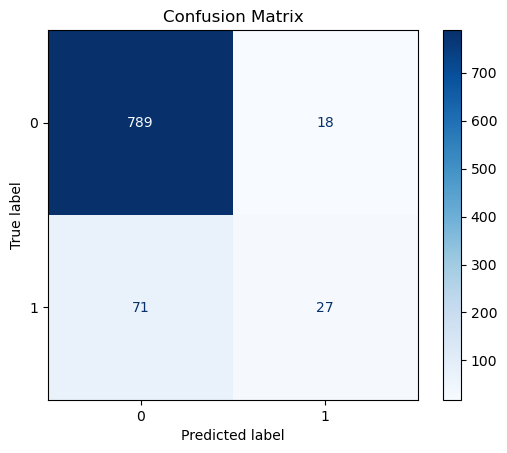

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [59]:
# 3. Deploying the Model

In [61]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

app = Flask(__name__)

# Load the trained model
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    # Convert input data to a numpy array
    input_data = np.array(data['features']).reshape(1, -1)
    # Make prediction
    prediction = model.predict(input_data)
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'